In [4]:
import pandas as pd 
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.svm import LinearSVC

from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

In [5]:
#import file, describe
heart = pd.read_csv('heart_2020.csv')
heart_og = pd.read_csv('heart_2020.csv')
heart.info()
heart.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
heart.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [8]:
model_columns = ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Sex', 'AgeCategory']
heart_model = heart.loc[:, model_columns]
heart_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   HeartDisease     319795 non-null  object 
 1   BMI              319795 non-null  float64
 2   Smoking          319795 non-null  object 
 3   AlcoholDrinking  319795 non-null  object 
 4   Sex              319795 non-null  object 
 5   AgeCategory      319795 non-null  object 
dtypes: float64(1), object(5)
memory usage: 14.6+ MB


In [9]:
#Create BMI categories
bins = [0, 25, 30, 100]
labels = [1, 2, 3]
heart_model['BMI'] = pd.cut(heart_model['BMI'], bins=bins, labels=labels)
heart_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   HeartDisease     319795 non-null  object  
 1   BMI              319795 non-null  category
 2   Smoking          319795 non-null  object  
 3   AlcoholDrinking  319795 non-null  object  
 4   Sex              319795 non-null  object  
 5   AgeCategory      319795 non-null  object  
dtypes: category(1), object(5)
memory usage: 12.5+ MB


In [10]:
heart_model.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Sex,AgeCategory
0,No,1,Yes,No,Female,55-59
1,No,1,No,No,Female,80 or older
2,No,2,Yes,No,Male,65-69
3,No,1,No,No,Female,75-79
4,No,1,No,No,Female,40-44


In [11]:
#Check AgeCategory
heart_model['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [12]:
#Get the sorted array of unique values from the AgeCategory column
age_array = np.sort(heart_model['AgeCategory'].unique())

#Create a range of numbers from 1 to 13
age_range = np.arange(1, 14)

#Create a dictionary with the array items as keys and the range items as values
age_dict = {age: num for age, num in zip(age_array, age_range)}

#Check the dictionary
print(age_dict)

{'18-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5, '45-49': 6, '50-54': 7, '55-59': 8, '60-64': 9, '65-69': 10, '70-74': 11, '75-79': 12, '80 or older': 13}


In [13]:
#Map AgeCategories to number groups for easier analysis
heart_model['AgeCategory_Num'] = heart_model['AgeCategory'].map(age_dict)
heart_model['AgeCategory'].unique()
heart_model.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Sex,AgeCategory,AgeCategory_Num
0,No,1,Yes,No,Female,55-59,8
1,No,1,No,No,Female,80 or older,13
2,No,2,Yes,No,Male,65-69,10
3,No,1,No,No,Female,75-79,12
4,No,1,No,No,Female,40-44,5


Text(0, 0.5, 'Count')

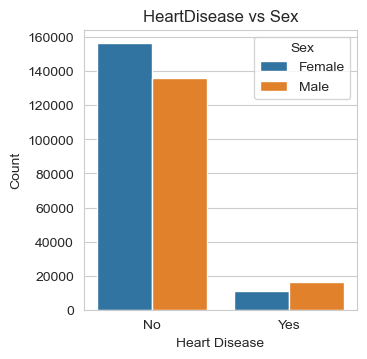

In [14]:
#Exploratory Data Analysis of Variables 
# Set the style and size of the plots
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

# Create a countplot of HeartDisease vs Sex
plt.subplot(2, 3, 1)
sns.countplot(x='HeartDisease', hue='Sex', data=heart_model)
plt.title('HeartDisease vs Sex')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

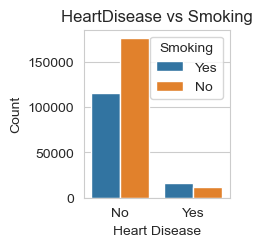

In [15]:
# Create a countplot of HeartDisease vs Smoking
plt.subplot(2, 3, 2)
sns.countplot(x='HeartDisease', hue='Smoking', data=heart_model)
plt.title('HeartDisease vs Smoking')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

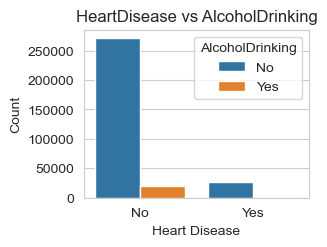

In [16]:
# Create a countplot of HeartDisease vs AlcoholDrinking
plt.subplot(2, 2, 2)
sns.countplot(x='HeartDisease', hue='AlcoholDrinking', data=heart_model)
plt.title('HeartDisease vs AlcoholDrinking')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

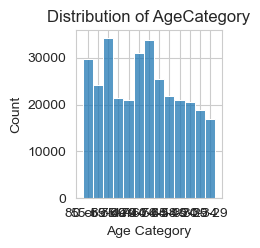

In [17]:
# Create a histogram of AgeCategory with wider bins
plt.subplot(2, 3, 4)
sns.histplot(x='AgeCategory', data=heart_model, binwidth=1)
plt.title('Distribution of AgeCategory')
plt.xlabel('Age Category')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

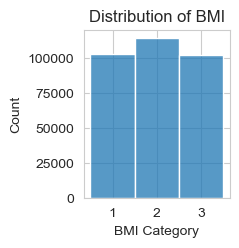

In [18]:
# Create a histogram of BMI
plt.subplot(2, 3, 5)
sns.histplot(x='BMI', data=heart_model)
plt.title('Distribution of BMI')
plt.xlabel('BMI Category')
plt.ylabel('Count')

C:\Users\Colin\AppData\Local\Temp\ipykernel_17308\2366013331.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heart_og.corr(), annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Correlation Map')

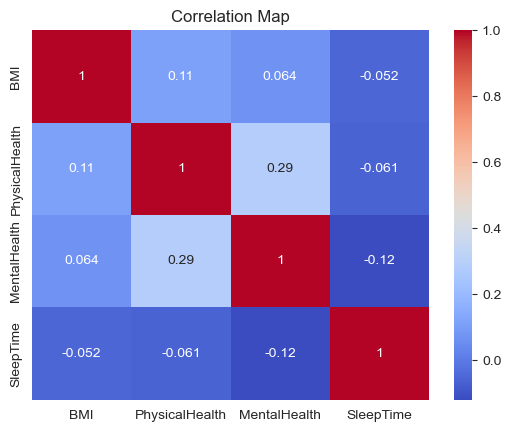

In [19]:
# Create a heatmap of the correlation matrix
sns.heatmap(heart_og.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Map')

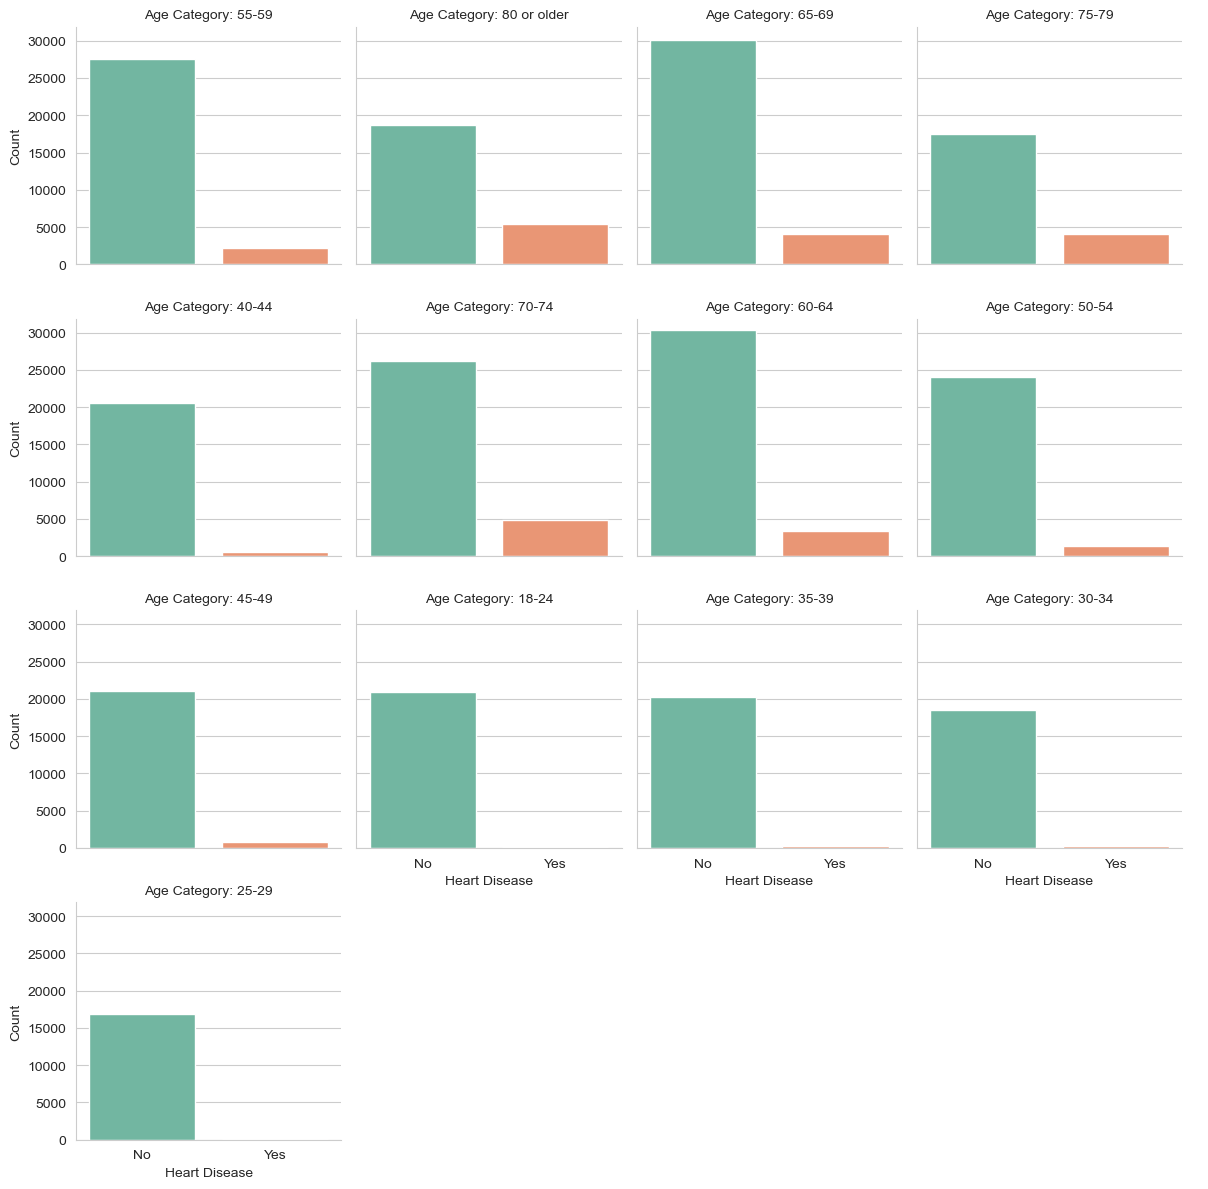

In [20]:
g = sns.FacetGrid(heart_model, col='AgeCategory', col_wrap=4)
g.map(sns.countplot, 'HeartDisease', order=['No', 'Yes'], palette='Set2')
g.add_legend()
g.set_axis_labels('Heart Disease', 'Count')
g.set_titles('Age Category: {col_name}')

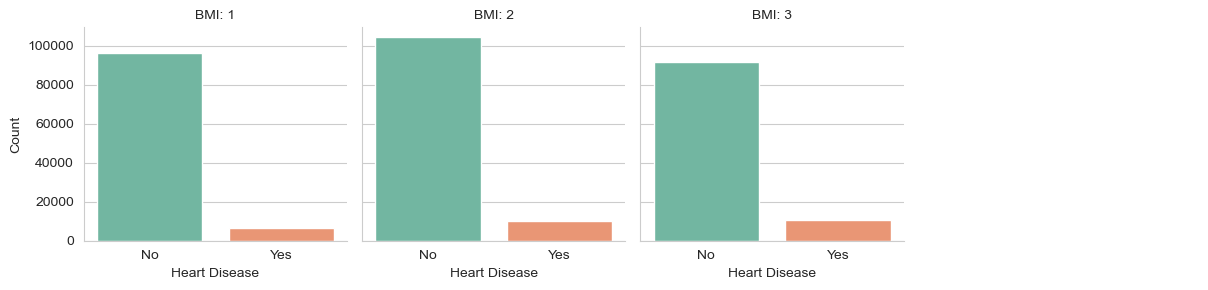

In [21]:
g = sns.FacetGrid(heart_model, col='BMI', col_wrap=4)
g.map(sns.countplot, 'HeartDisease', order=['No', 'Yes'], palette='Set2')
g.add_legend()
g.set_axis_labels('Heart Disease', 'Count')
g.set_titles('BMI: {col_name}')

In [22]:
#Create a list of binary variables
categorical_vars =  ['Smoking', 'AlcoholDrinking', 'Sex', 'AgeCategory', 'BMI']

#Loop through each variable and perform the chi-square test
for var in categorical_vars:
    #Create a contingency table of HeartDisease and the variable
    contingency = pd.crosstab(heart_model['HeartDisease'], heart_model[var])
    print("Contingency table for", var)
    print(contingency)
    print()

    #Perform the chi-square test and print the results
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    print("Chi-square statistic for", var, ":", chi2)
    print("p-value for", var, ":", p)
    print("Degrees of freedom for", var, ":", dof)
    print("Expected frequencies for", var, ":")
    print(expected)
    print()

Contingency table for Smoking
Smoking           No     Yes
HeartDisease                
No            176551  115871
Yes            11336   16037

Chi-square statistic for Smoking : 3713.0331469808216
p-value for Smoking : 0.0
Degrees of freedom for Smoking : 1
Expected frequencies for Smoking :
[[171804.72588377 120617.27411623]
 [ 16082.27411623  11290.72588377]]

Contingency table for AlcoholDrinking
AlcoholDrinking      No    Yes
HeartDisease                  
No               271786  20636
Yes               26232   1141

Chi-square statistic for AlcoholDrinking : 328.64916890132054
p-value for AlcoholDrinking : 1.892352227090306e-73
Degrees of freedom for AlcoholDrinking : 1
Expected frequencies for AlcoholDrinking :
[[272509.01232352  19912.98767648]
 [ 25508.98767648   1864.01232352]]

Contingency table for Sex
Sex           Female    Male
HeartDisease                
No            156571  135851
Yes            11234   16139

Chi-square statistic for Sex : 1568.3069168517372
p-v

In [23]:
#Convert the binary variables into a binary numeric variables
le = LabelEncoder()
heart_model = heart_model.drop(columns=['AgeCategory'])
heart_model['HeartDisease'] = le.fit_transform(heart_model['HeartDisease'])
heart_model['Sex'] = le.fit_transform(heart_model['Sex'])
heart_model['AlcoholDrinking'] = le.fit_transform(heart_model['AlcoholDrinking'])
heart_model['Smoking'] = le.fit_transform(heart_model['Smoking'])

heart_model.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Sex,AgeCategory_Num
0,0,1,1,0,0,8
1,0,1,0,0,0,13
2,0,2,1,0,1,10
3,0,1,0,0,0,12
4,0,1,0,0,0,5


In [24]:
#Split the data into training and testing sets
X = heart_model.drop('HeartDisease', axis=1)
y = heart_model['HeartDisease']

#Need to balance HeartDisease, will use SMOTE
sm = SMOTE(random_state=42)

#Resample X and y using SMOTE
X_smote, y_smote = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [25]:
#Encode the categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [26]:
#Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [27]:
#Define and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [28]:
#Define and fit the SVC model
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC()

In [29]:
#Predict the labels for the test set using both models
y_pred_log = log_reg.predict(X_test)
y_pred_svc = svc.predict(X_test)

In [30]:
#Calculate and print the metrics for both models
print("Metrics for logistic regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))
print()

print("Metrics for SVC:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Precision:", precision_score(y_test, y_pred_svc))
print("Recall:", recall_score(y_test, y_pred_svc))
print("F1-score:", f1_score(y_test, y_pred_svc))
print()

Metrics for logistic regression:
Accuracy: 0.7134881891783293
Precision: 0.6952232038151825
Recall: 0.7602592161958827
F1-score: 0.7262881924876877

Metrics for SVC:
Accuracy: 0.7121801502962324
Precision: 0.6839242307464279
Recall: 0.788985021544354
F1-score: 0.7327076981707317



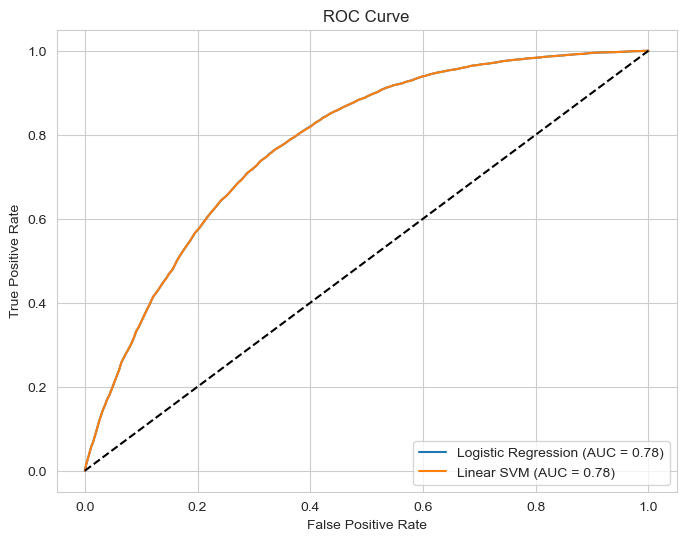

In [31]:
# Predict the probabilities for the test set using both models
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
y_prob_svc = svc.decision_function(X_test)

# Calculate the false positive rate and true positive rate for both models
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_prob_svc)

# Calculate the AUC score for both models
auc_log = auc(fpr_log, tpr_log)
auc_svc = auc(fpr_svc, tpr_svc)

# Plot the ROC curve for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = %.2f)' % auc_log)
plt.plot(fpr_svc, tpr_svc, label='Linear SVM (AUC = %.2f)' % auc_svc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [37]:
#Deep Learning - Feedforward neural network model

# Import modules
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam

# Split the training data into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define network architecture
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu')) # 6 features in the input layer
model.add(Dropout(0.2)) # Dropout layer to prevent overfitting
model.add(Dense(4, activation='relu')) # Hidden layer with 4 neurons
model.add(Dense(1, activation='sigmoid')) # Output layer with 1 neuron for binary classification

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

# Fit model to training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate model on test data
model.evaluate(X_test, y_test)


Epoch 1/10
11697/11697 [==============================] - 14s 1ms/step - loss: 0.5750 - accuracy: 0.6996 - val_loss: 0.5586 - val_accuracy: 0.7144
Epoch 2/10
11697/11697 [==============================] - 14s 1ms/step - loss: 0.5638 - accuracy: 0.7099 - val_loss: 0.5581 - val_accuracy: 0.7139
Epoch 3/10
11697/11697 [==============================] - 14s 1ms/step - loss: 0.5631 - accuracy: 0.7109 - val_loss: 0.5564 - val_accuracy: 0.7137
Epoch 4/10
11697/11697 [==============================] - 13s 1ms/step - loss: 0.5623 - accuracy: 0.7113 - val_loss: 0.5594 - val_accuracy: 0.7142
Epoch 5/10
11697/11697 [==============================] - 13s 1ms/step - loss: 0.5620 - accuracy: 0.7111 - val_loss: 0.5587 - val_accuracy: 0.7131
Epoch 6/10
11697/11697 [==============================] - 13s 1ms/step - loss: 0.5615 - accuracy: 0.7118 - val_loss: 0.5636 - val_accuracy: 0.7113
Epoch 7/10
11697/11697 [==============================] - 13s 1ms/step - loss: 0.5611 - accuracy: 0.7116 - val_loss: 0

NameError: name 'X_new' is not defined